In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [6]:
data_path = 'taxi_trip_pricing.csv'
df = pd.read_csv(data_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [8]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
X = df.drop(columns=["Trip_Price"])
y = df["Trip_Price"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear regression R^2:", r2_score(y_test, y_pred_lr))

Linear regression R^2: 0.7645450159182325


In [13]:
print("Linear regression MSE: ", mean_squared_error(y_test, y_pred_lr))

Linear regression MSE:  195.5968995093997


In [14]:
print("Linear regression MAE: ", mean_absolute_error(y_test, y_pred_lr))

Linear regression MAE:  10.006681797125259


In [15]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
print("Ridge regression R^2:", r2_score(y_test, ridge_predictions))
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_predictions))
print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_predictions))

Ridge regression R^2: 0.7617965014964806
Ridge Regression MSE: 197.88014231799042
Ridge Regression MAE: 10.133849330644592


In [16]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
print("Lasso regression R^2:", r2_score(y_test, lasso_predictions))
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_predictions))
print("Lasso Regression MAE:", mean_absolute_error(y_test, lasso_predictions))

Lasso regression R^2: 0.7023560001045722
Lasso Regression MSE: 247.25848876872388
Lasso Regression MAE: 12.253023859339851


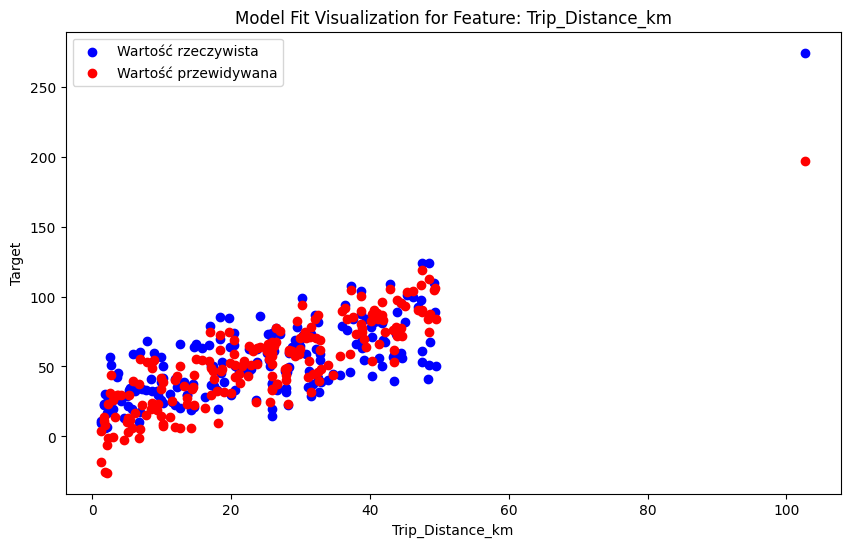

In [17]:
import matplotlib.pyplot as plt
feature_to_visualize = X.columns[0]
plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature_to_visualize], y_test, color='blue', label='Wartość rzeczywista')
plt.scatter(X_test[feature_to_visualize], y_pred_lr, color='red', label='Wartość przewidywana')
plt.title(f'Model Fit Visualization for Feature: {feature_to_visualize}')
plt.xlabel(feature_to_visualize)
plt.ylabel('Target')
plt.legend()
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X, y)
ridge_model = Ridge()
ridge_model.fit(X, y)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
lr_feature_importance = pd.DataFrame({
    'Cecha': X.columns,
    'Wspolczynnik': lr.coef_
})
lr_feature_importance = lr_feature_importance.sort_values(by='Wspolczynnik', ascending=False)
print("Regresja liniowa - wpływ zmiennych")
print(lr_feature_importance)

ridge_feature_importance = pd.DataFrame({
    'Cecha': X.columns,
    'Wspolczynnik': ridge_model.coef_
})
ridge_feature_importance = ridge_feature_importance.sort_values(by='Wspolczynnik', ascending=False)
print("Ridge - wpływ zmiennych")
print(ridge_feature_importance)

lasso_feature_importance = pd.DataFrame({
    'Cecha': X.columns,
    'Wspolczynnik': lasso_model.coef_
})
lasso_feature_importance = lasso_feature_importance.sort_values(by='Wspolczynnik', ascending=False)
print("Lasso - wpływ zmiennych")
print(lasso_feature_importance)

Regresja liniowa - wpływ zmiennych
                   Cecha  Wspolczynnik
8        Per_Minute_Rate     52.870129
7            Per_Km_Rate     24.436220
0       Trip_Distance_km      1.715212
3        Passenger_Count      0.329111
9  Trip_Duration_Minutes      0.288224
6              Base_Fare      0.259181
5                Weather      0.194247
2            Day_of_Week     -0.127692
4     Traffic_Conditions     -0.204518
1            Time_of_Day     -0.251657
Ridge - wpływ zmiennych
                   Cecha  Wspolczynnik
8        Per_Minute_Rate     48.999941
7            Per_Km_Rate     24.325771
0       Trip_Distance_km      1.714664
3        Passenger_Count      0.341007
9  Trip_Duration_Minutes      0.287930
6              Base_Fare      0.250049
5                Weather      0.214700
2            Day_of_Week     -0.111990
4     Traffic_Conditions     -0.197355
1            Time_of_Day     -0.252624
Lasso - wpływ zmiennych
                   Cecha  Wspolczynnik
8        Per_Minute_

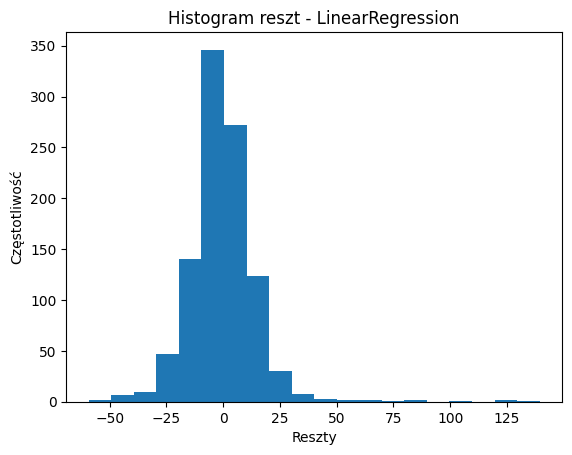

Regresja liniowa - Statystyka Shapiro-Wilka: 0.8362583171591159 P-wartość: 7.936745881492283e-31


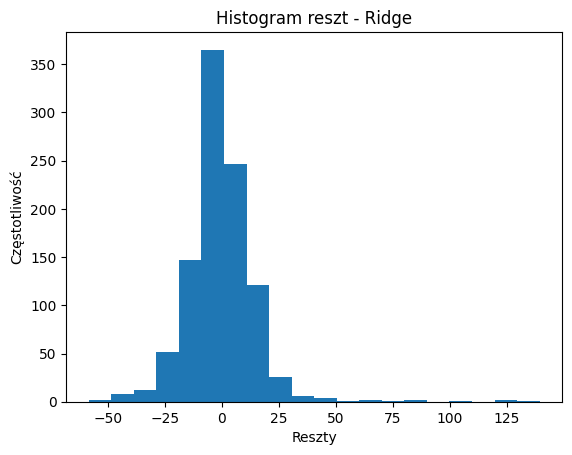

Ridge - Statystyka Shapiro-Wilka: 0.8380114882871011 P-wartość: 1.0800329726154432e-30


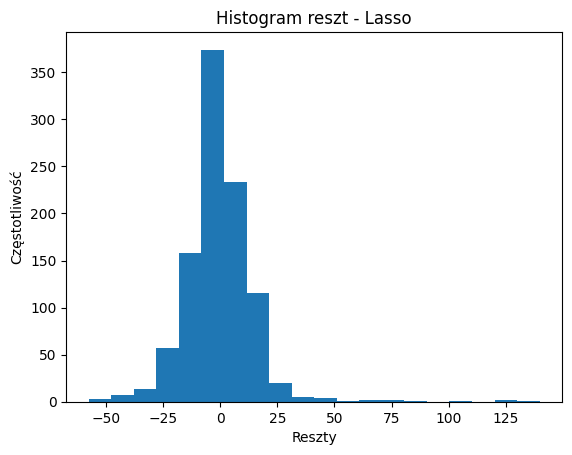

Lasso - Statystyka Shapiro-Wilka: 0.8399476078618477 P-wartość: 1.5223839707422412e-30


In [19]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
residuals_lr = y - lr.predict(X)

plt.hist(residuals_lr, bins=20)
plt.title("Histogram reszt - LinearRegression")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()


stat_lr, p_lr = shapiro(residuals_lr)
print("Regresja liniowa - Statystyka Shapiro-Wilka:", stat_lr, "P-wartość:", p_lr)


residuals_ridge = y - ridge_model.predict(X)

plt.hist(residuals_ridge, bins=20)
plt.title("Histogram reszt - Ridge")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()


stat_ridge, p_ridge = shapiro(residuals_ridge)
print("Ridge - Statystyka Shapiro-Wilka:", stat_ridge, "P-wartość:", p_ridge)


residuals_lasso = y - lasso_model.predict(X)
plt.hist(residuals_lasso, bins=20)
plt.title("Histogram reszt - Lasso")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()


stat_lasso, p_lasso = shapiro(residuals_lasso)
print("Lasso - Statystyka Shapiro-Wilka:", stat_lasso, "P-wartość:", p_lasso)


In [20]:
from statsmodels.stats.stattools import durbin_watson

dw_stat_lr = durbin_watson(residuals_lr)
print("Regresja liniowa - Statystyka Durbin-Watsona:", dw_stat_lr)

dw_stat_ridge = durbin_watson(residuals_ridge)
print("Ridge - Statystyka Durbin-Watsona:", dw_stat_ridge)


dw_stat_lasso = durbin_watson(residuals_lasso)
print("Lasso - Statystyka Durbin-Watsona:", dw_stat_lasso)


Regresja liniowa - Statystyka Durbin-Watsona: 2.004100590552543
Ridge - Statystyka Durbin-Watsona: 2.0071666139423345
Lasso - Statystyka Durbin-Watsona: 2.0102189355402102


In [21]:
!pip install tensorflow

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = df.drop(columns=["Trip_Price"]).values
y = df["Trip_Price"].values
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error (MAE):", mae)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.2242 - mae: 0.6853 - val_loss: 0.3809 - val_mae: 0.3310
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3978 - mae: 0.3971 - val_loss: 0.1595 - val_mae: 0.2610
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2444 - mae: 0.3406 - val_loss: 0.0994 - val_mae: 0.2024
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1857 - mae: 0.3110 - val_loss: 0.0794 - val_mae: 0.1897
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1439 - mae: 0.2806 - val_loss: 0.0955 - val_mae: 0.2144
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1399 - mae: 0.2753 - val_loss: 0.0885 - val_mae: 0.1950
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1270 - mae: 0.2533 - val_loss: 0.0932 - val_mae: 0.1938
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1748 - mae: 0.2484 - val_loss: 0.0979 - val_mae: 0.1951
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1253 - mae: 0

In [27]:
!pip install pydot

In [28]:
!pip install graphviz

Podsumowanie modelu:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

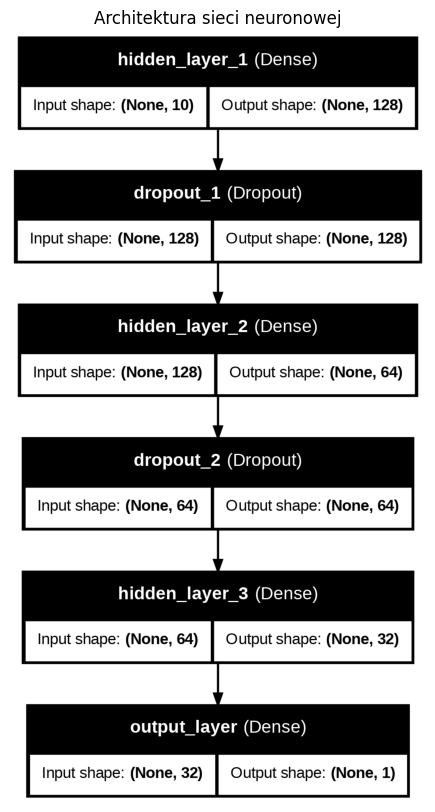

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), name='hidden_layer_1'),
    Dropout(0.2, name='dropout_1'),
    Dense(64, activation='relu', name='hidden_layer_2'),
    Dropout(0.2, name='dropout_2'),
    Dense(32, activation='relu', name='hidden_layer_3'),
    Dense(1, name='output_layer')
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Podsumowanie modelu:")
model.summary()

plot_file = "model_architecture.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True)

img = plt.imread(plot_file)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Architektura sieci neuronowej")
plt.show()
